In [1]:
import os
import requests

base_url = "https://airquality.cpcb.gov.in/dataRepository/download_file?file_name=AQI_hourly/city_level/ahmedabad/2023/"

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Output directory
output_dir = "Hourly AQI Data"
os.makedirs(output_dir, exist_ok=True)

# Iterate over months and download the files
for month in months:
    file_name = f"ahmedabad_{month}_2023"
    download_url = f"{base_url}{month}/{file_name}.xlsx"  # Construct the URL
    output_path = os.path.join(output_dir, f"{file_name}.xlsx")  # Output file path

    print(f"Downloading {file_name}...")
    try:
        # Make the GET request
        response = requests.get(download_url, stream=True)
        response.raise_for_status()  # Raise an error for bad status codes
        
        # Save the file
        with open(output_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)

        print(f"Downloaded: {output_path}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {file_name}: {e}")

print("Download completed.")


Downloaded: Hourly AQI Data\ahmedabad_January_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_February_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_March_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_April_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_May_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_June_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_July_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_August_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_September_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_October_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_November_2023.xlsx
Downloaded: Hourly AQI Data\ahmedabad_December_2023.xlsx
Download completed.


In [23]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("Hourly AQI Data/ahmedabad_January_2023.xlsx")

df.head()

,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,1,195,187.0,170.0,153,178,137,169,141,110,...,110,110,110,110,110,170,308,290,231,228
1,2,201,186.0,269.0,203,112,111,119,138,175,...,122,110,110,110,110,128,203,240,231,218
2,3,205,187.0,162.0,211,157,110,110,110,110,...,110,110,110,110,110,110,175,213,222,201
3,4,149,154.0,110.0,110,110,110,110,110,110,...,110,110,110,110,110,110,126,149,149,110
4,5,110,110.0,110.0,110,110,110,110,110,110,...,122,110,119,110,145,175,144,151,168,140


In [24]:
# Check for NaN values
df.isna().sum()

Date        0
00:00:00    0
01:00:00    2
02:00:00    1
03:00:00    0
04:00:00    0
05:00:00    0
06:00:00    0
07:00:00    0
08:00:00    0
09:00:00    0
10:00:00    0
11:00:00    0
12:00:00    0
13:00:00    0
14:00:00    0
15:00:00    0
16:00:00    0
17:00:00    0
18:00:00    0
19:00:00    0
20:00:00    0
21:00:00    0
22:00:00    0
23:00:00    0
dtype: int64

In [40]:
# Replace NaN with Average of column without decimal precision
df["01:00:00"] = df["01:00:00"].fillna(df["01:00:00"].mean().round().astype(int))
df["02:00:00"] = df["02:00:00"].fillna(df["02:00:00"].mean().round().astype(int))

In [41]:
df

,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,1,195,187.000000,170.000000,153,178,137,169,141,110,...,110,110,110,110,110,170,308,290,231,228
1,2,201,186.000000,269.000000,203,112,111,119,138,175,...,122,110,110,110,110,128,203,240,231,218
2,3,205,187.000000,162.000000,211,157,110,110,110,110,...,110,110,110,110,110,110,175,213,222,201
3,4,149,154.000000,110.000000,110,110,110,110,110,110,...,110,110,110,110,110,110,126,149,149,110
4,5,110,110.000000,110.000000,110,110,110,110,110,110,...,122,110,119,110,145,175,144,151,168,140
5,6,133,106.000000,61.000000,70,58,44,56,70,83,...,105,103,108,115,125,103,155,158,125,125
6,7,82,58.000000,81.000000,86,78,74,68,54,83,...,95,105,108,124,133,156,186,189,191,215
7,8,183,157.000000,142.000000,135,117,100,87,90,111,...,111,104,102,83,88,130,209,211,215,227
8,9,315,263.000000,273.000000,238,183,188,137,128,143,...,121,141,75,62,57,121,243,212,297,212
9,10,292,262.000000,250.000000,168,142,116,135,147,144,...,137,108,94,136,70,139,223,234,234,241


In [42]:
monthly_aqi = []
daily_aqi = []

for date in df["Date"]:
    if date+1 < df["Date"].max():
        current_day = df.iloc[date][17:].tolist()
        next_day = df.iloc[date+1][1:17].tolist()

        aqi_day = current_day + next_day
        avg_aqi = sum(aqi_day) // len(aqi_day)
        daily_aqi.append(avg_aqi)
        # Print the average AQI for the day
        print(f"Average AQI for {date+1}: {avg_aqi}")

monthly_aqi.append(daily_aqi)

Average AQI for 2: 145.0
Average AQI for 3: 132.0
Average AQI for 4: 118.0
Average AQI for 5: 107.0
Average AQI for 6: 94.0
Average AQI for 7: 132.0
Average AQI for 8: 174.0
Average AQI for 9: 163.0
Average AQI for 10: 164.0
Average AQI for 11: 105.0
Average AQI for 12: 174.0
Average AQI for 13: 97.0
Average AQI for 14: 90.0
Average AQI for 15: 100.0
Average AQI for 16: 111.0
Average AQI for 17: 134.0
Average AQI for 18: 102.0
Average AQI for 19: 133.0
Average AQI for 20: 145.0
Average AQI for 21: 102.0
Average AQI for 22: 133.0
Average AQI for 23: 159.0
Average AQI for 24: 144.0
Average AQI for 25: 131.0
Average AQI for 26: 135.0
Average AQI for 27: 121.0
Average AQI for 28: 124.0
Average AQI for 29: 154.0
Average AQI for 30: 111.0


In [68]:
import pandas as pd

# List of months to iterate through
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Initialize the monthly AQI list
monthly_aqi = []

# Iterate through each month
for month in months:
    # Construct the file name for the current month
    file_name = f"Hourly AQI Data/ahmedabad_{month}_2023.xlsx"
    
    try:
        # Read the Excel file
        df = pd.read_excel(file_name)
        
        # Handle NaN values by replacing them with the rounded average
        for col in df.columns[1:]:  # Assuming first column is "Date" and rest are hourly data
            df[col] = df[col].fillna(df[col].mean().round().astype(int))
        
        # Extract daily AQI data for the current month
        daily_aqi = []
        for i in range(len(df) - 1):  # Loop through all days except the last
            current_day = df.iloc[i, 17:].tolist()  # 4 PM to 12 AM
            next_day = df.iloc[i + 1, 1:17].tolist()  # 12 AM to 4 PM of the next day
            aqi_day = current_day + next_day
            avg_aqi = sum(aqi_day) // len(aqi_day)
            daily_aqi.append(avg_aqi)
        
        # Add the daily AQI data to the monthly AQI list
        monthly_aqi.append(daily_aqi)
        print(f"Processed data for {month}.")
    
    except FileNotFoundError:
        print(f"File not found: {file_name}. Skipping this month.")
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")


Processed data for January.
Processed data for February.
Processed data for March.
Processed data for April.
Processed data for May.
Processed data for June.
Processed data for July.
Processed data for August.
Processed data for September.
Processed data for October.
Processed data for November.
Processed data for December.


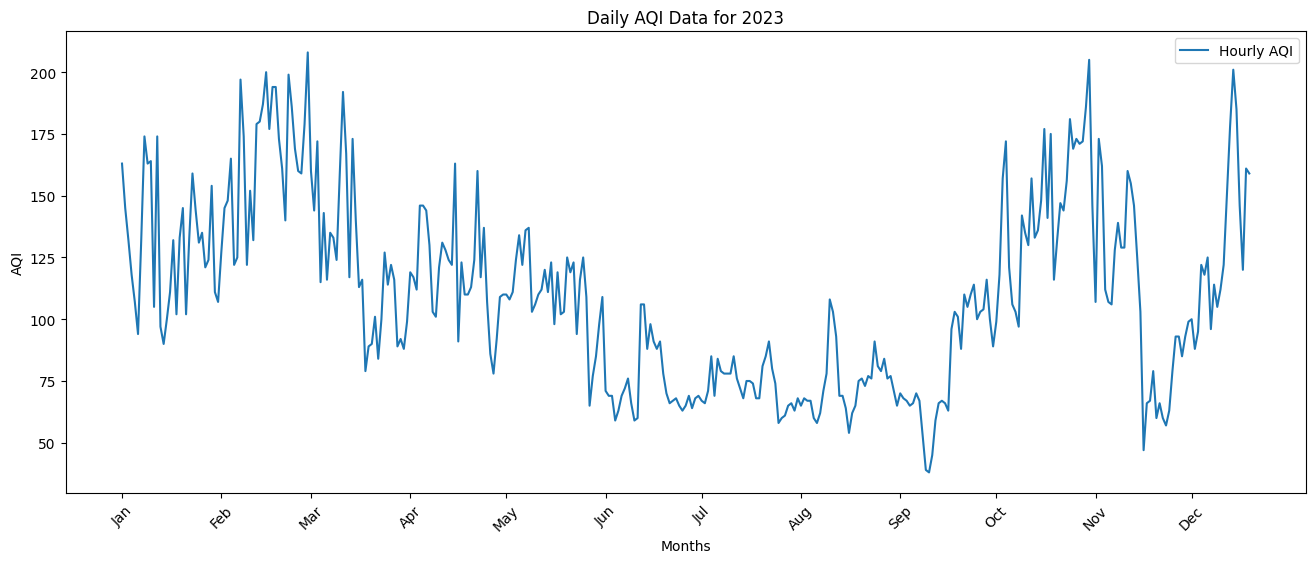

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the list
flat_aqi = [aqi for day_aqis in monthly_aqi for aqi in day_aqis]

# Generate a continuous date range for 2023 (365 days)
start_date = pd.to_datetime("2023-01-01")
all_dates = pd.date_range(start=start_date, periods=365, freq='D')

# Generate the corresponding dates for AQI values
daily_dates = all_dates[:len(flat_aqi)]

# Plot the invisible points for all 365 days
plt.figure(figsize=(16, 6))
plt.plot(all_dates, [None] * 365, alpha=0, color='none')  # Invisible points

# Overlay the actual AQI values
plt.plot(daily_dates, flat_aqi, label="Hourly AQI")

# Format x-ticks to show month names
monthly_ticks = pd.date_range(start="2023-01-01", end="2023-12-31", freq="MS")
plt.xticks(monthly_ticks, [date.strftime("%b") for date in monthly_ticks], rotation=45)

# Add labels and title
plt.xlabel("Months")
plt.ylabel("AQI")
plt.title("Daily AQI Data for 2023")
plt.legend()

# Show the plot
plt.show()


In [84]:
daily_aqi_df = pd.read_csv("daily_aqi.csv")
daily_aqi_df.head()

,Date,AQI,AQI Tag,Pollutants
0,2023-01-01,127,Moderate,NO\n2
1,2023-01-02,137,Moderate,PM\n2.5
2,2023-01-03,110,Moderate,PM\n10
3,2023-01-04,110,Moderate,PM\n10
4,2023-01-05,110,Moderate,PM\n10


In [86]:
daily_aqi_df["Date"] = pd.to_datetime(daily_aqi_df["Date"])
daily_aqi_df["AQI"] = daily_aqi_df["AQI"].astype(int)

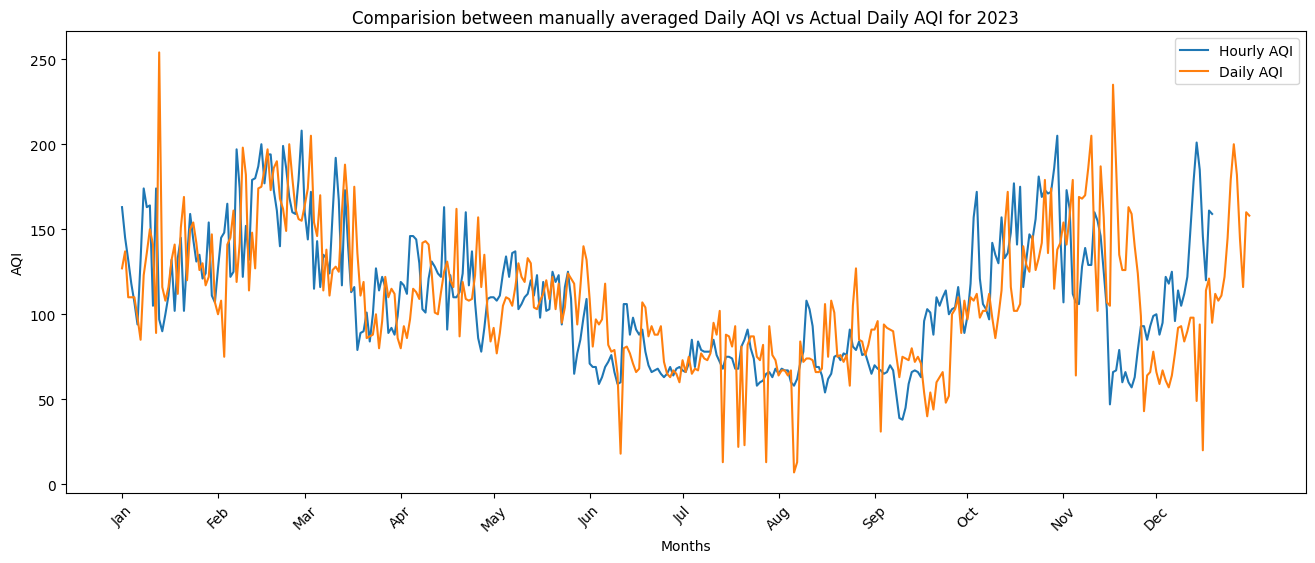

In [88]:
# Plot the invisible points for all 365 days
plt.figure(figsize=(16, 6))
plt.plot(all_dates, [None] * 365, alpha=0, color='none')  # Invisible points

# Overlay the actual AQI values
plt.plot(daily_dates, flat_aqi, label="Hourly AQI")
plt.plot(daily_aqi_df["Date"], daily_aqi_df["AQI"], label="Daily AQI")

# Format x-ticks to show month names
monthly_ticks = pd.date_range(start="2023-01-01", end="2023-12-31", freq="MS")
plt.xticks(monthly_ticks, [date.strftime("%b") for date in monthly_ticks], rotation=45)

# Add labels and title
plt.xlabel("Months")
plt.ylabel("AQI")
plt.title("Comparision between manually averaged Daily AQI vs Actual Daily AQI for 2023")
plt.legend()

# Show the plot
plt.show()